In [21]:
#ImportingLibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
#ExploringData
df = pd.read_csv("cars_engage_2022.csv")
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#CleaningData
df['car'] = df.Make + ' ' + df.Model
features = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[features]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

# Describing the data

df.describe() tells us about the mean, median, mode, and much more about the numeric data value of the dataset

In [24]:
df.describe()

,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,1759.184397,4.220871,18.515380,141.617224,244.030395,50.920871,1583.807340,4252.248875,1775.582416,4.570415,5.266464,2606.583587,3.175279,48009.175279
std,924.993708,1.380041,4.588321,116.238232,162.614837,15.318039,152.821356,447.163835,144.234947,0.714850,1.085082,180.699575,2.500847,105460.579796
min,624.000000,2.000000,3.400000,33.530000,10.000000,24.000000,1.845000,4.640000,1.845000,2.000000,2.000000,1840.000000,0.000000,3310.000000
25%,1198.000000,4.000000,16.000000,81.860000,120.000000,40.000000,1495.000000,3985.000000,1695.000000,4.000000,5.000000,2470.000000,2.000000,10104.500000
50%,1496.000000,4.000000,18.490000,102.580000,200.000000,45.000000,1549.000000,4315.000000,1745.000000,5.000000,5.000000,2590.000000,2.000000,13994.000000
75%,1988.000000,4.000000,21.700000,152.880000,320.000000,60.000000,1655.000000,4568.000000,1832.000000,5.000000,5.000000,2700.000000,6.000000,27626.500000
max,6752.000000,12.000000,28.400000,778.210000,1712.000000,105.000000,2055.000000,5575.000000,2226.000000,5.000000,9.000000,3266.000000,14.000000,744944.000000


df.info() will tell us about the various columns of the dataset as well as if there are any null values in the data.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 1275
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          987 non-null    object 
 1   model         987 non-null    object 
 2   car           987 non-null    object 
 3   variant       987 non-null    object 
 4   body_type     987 non-null    object 
 5   fuel_type     987 non-null    object 
 6   fuel_system   986 non-null    object 
 7   type          987 non-null    object 
 8   drivetrain    986 non-null    object 
 9   displacement  987 non-null    int64  
 10  cylinders     987 non-null    int64  
 11  mileage       987 non-null    float64
 12  power         987 non-null    float64
 13  torque        987 non-null    int64  
 14  fuel_tank     987 non-null    float64
 15  height        987 non-null    float64
 16  length        987 non-null    float64
 17  width         987 non-null    float64
 18  doors         987 non-null   

# Correlation

Correlation analysis can reveal meaningful relationships between different metrics or groups of metrics. Information about those connections can provide new insights and reveal interdependencies.

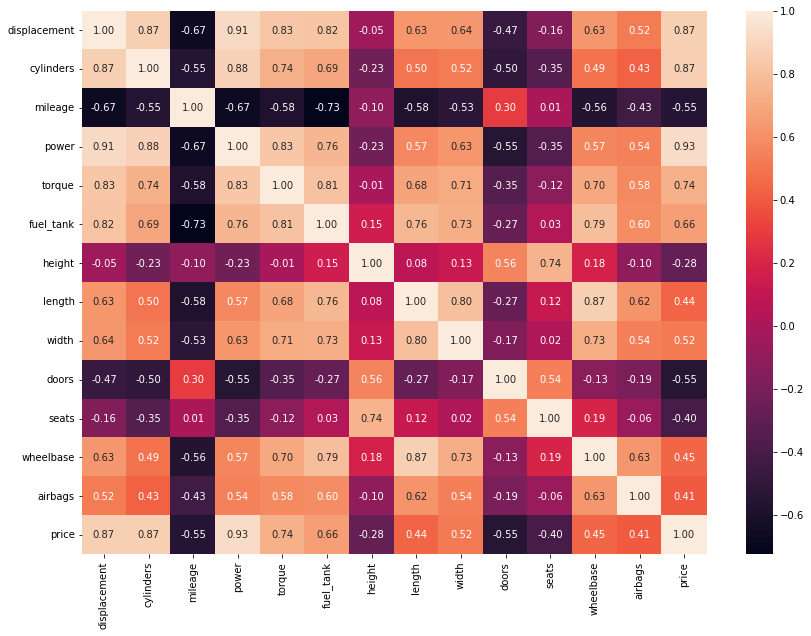

In [26]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

## Conclusion

1. Ex-Showroom price is positively correlated to Displacement.
2. Ex-Showroom Price is Positively Correlated to the number of Cylinders. This means, more the number of cylinders, more the ex-showroom price.

# Top Car Selling Companies in India

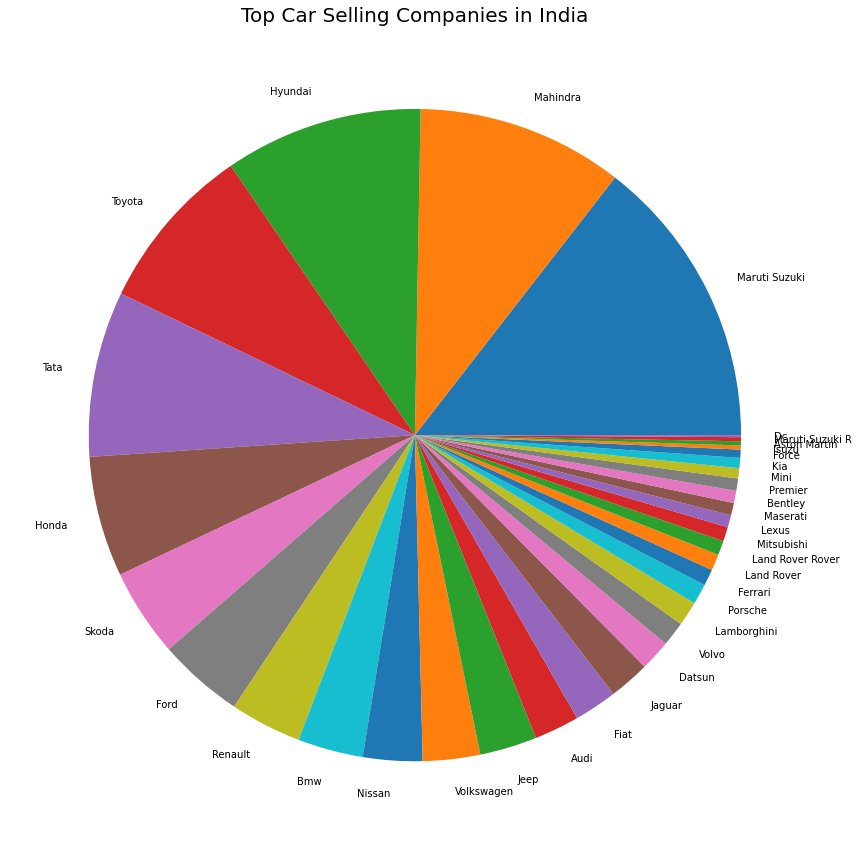

In [27]:
fig = plt.figure(figsize = (15,15))
ax = fig.subplots()
df.make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Selling Companies in India",fontsize=20)
plt.show()

## Conclusion

1. Maruti Suzuki has more car variants than any other company in India.

2. The Top 5 companies with more than car variants in India are Maruti Suzuki, Hyundai, Mahindra, Tata, and Toyota.

3. Sports car variants are very low

# Most Popular Car Type

Text(0, 0.5, 'Body Type')

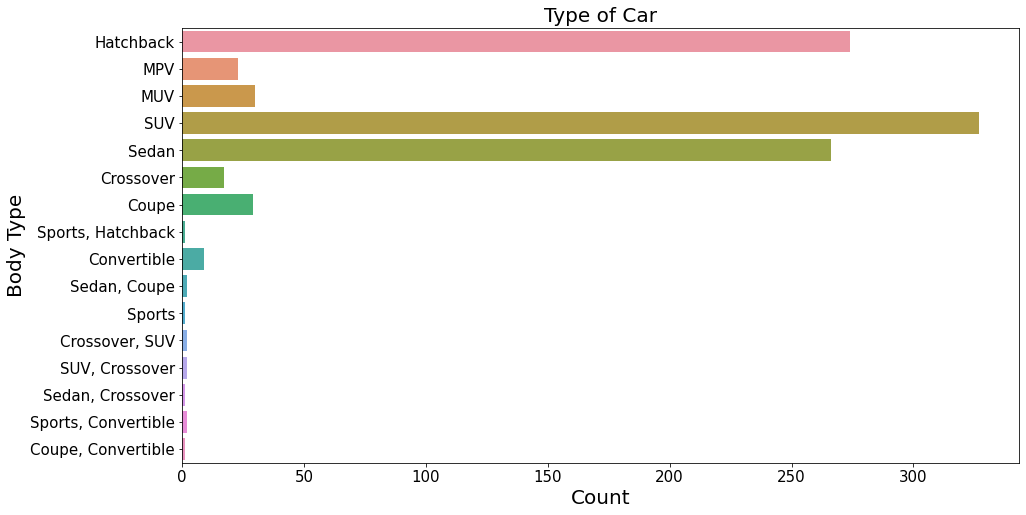

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, y='body_type')
plt.title('Type of Car',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Body Type', fontsize=20)

## Conclusion

From the above graph, we conclude that SUVs are the most popular type of Cars, followed by Hatchbacks in the 2nd Place and Sedans in the 3rd.

# Fuel Type

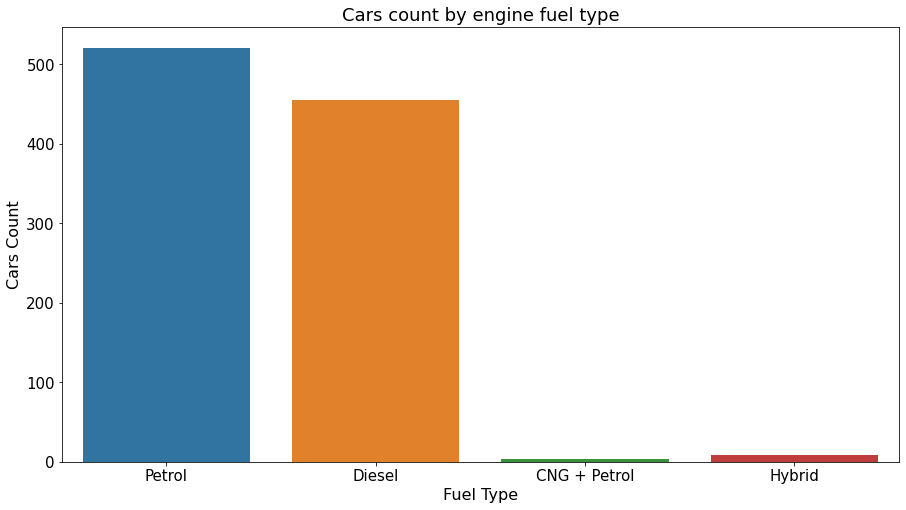

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='fuel_type')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Cars Count', fontsize=16);

## Conclusion

From the above bar graph, we conclude that petrol based and diesel based behicles are still the most abundant in the current scenario.

This data is going to change because electric vehicles have arrived in India.

# Engine Size

Text(0, 0.5, 'Count')

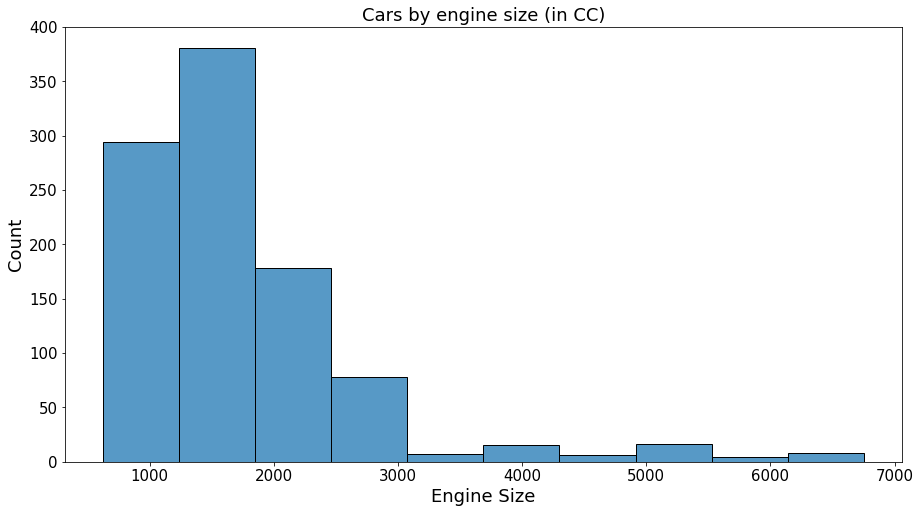

In [30]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='displacement',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Engine Size",fontsize=18)
plt.ylabel("Count",fontsize=18)

## Conclusion

From the above graph, we conclude that most of the engine size is between the range of 624cc to 2500cc.

# Horsepower of cars

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text major ticklabel objects>)

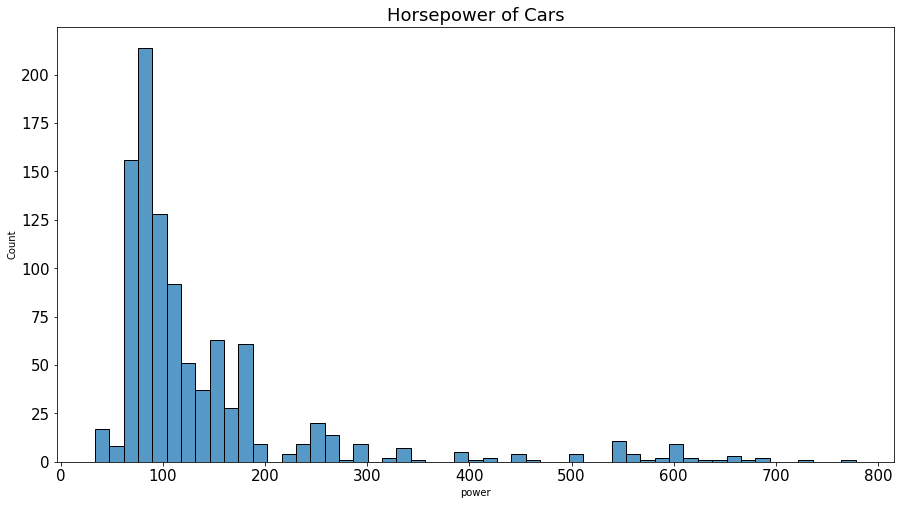

In [31]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='power')
plt.title('Horsepower of Cars',fontsize=18);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Price Distribution

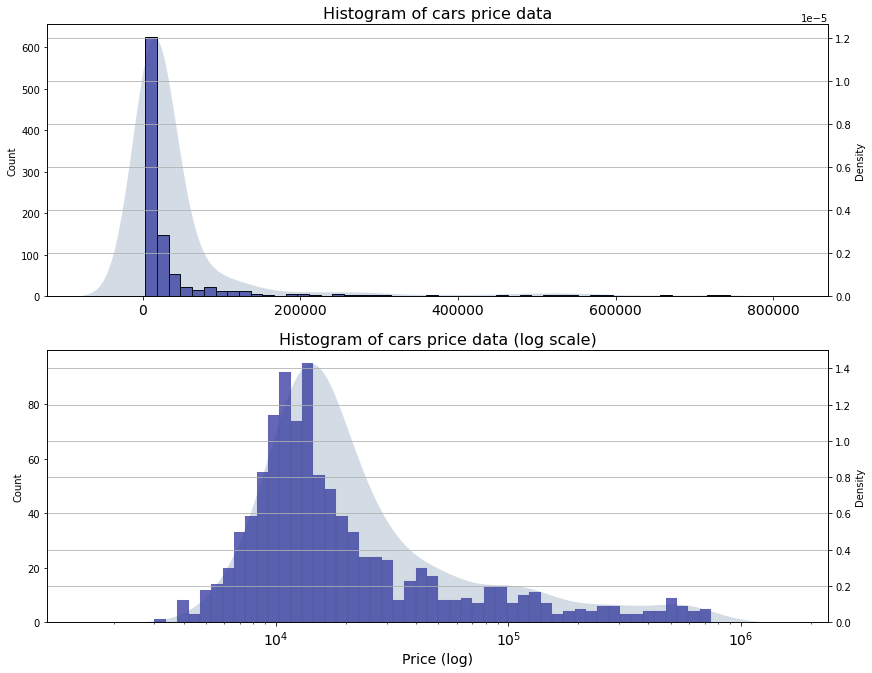

In [32]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

# Relationship between Power and Price of the Vehicle

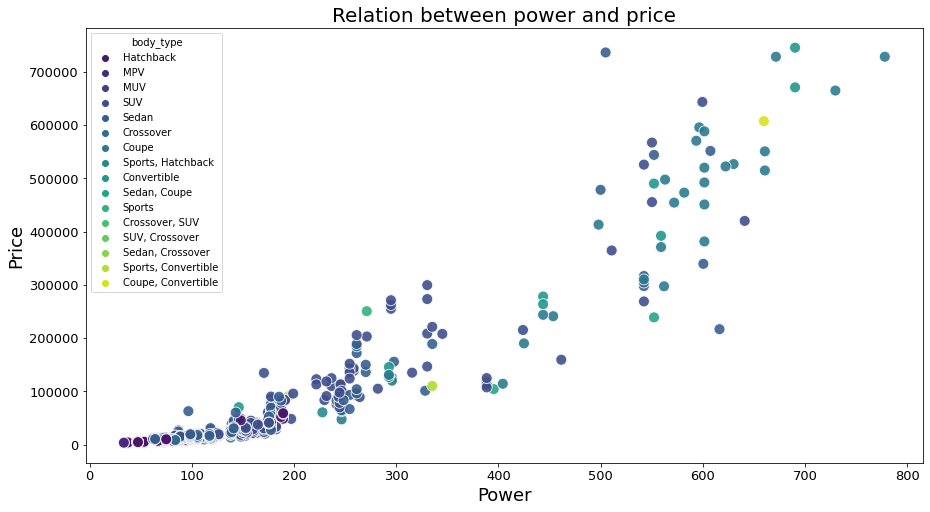

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Power',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title('Relation between power and price',fontsize=20);

## Conclusion

1. From the above graph, we conclude that when power of the vehicle increases, its price also increases.

2. The price and power of the sports car are the highest.

# Linear Regression Model

Linear Regression analysis is used here to understand the trend between the Price and Power of various vehicles. By having a good grasp on this, we can predcit prices for new vehicles as well.

In [34]:
df.price

0        4097
1        3310
3        4686
4        3811
5        4407
        ...  
1271    18228
1272    19894
1273    20034
1274    16814
1275    96075
Name: price, Length: 987, dtype: int64

In [35]:
df.power

0        37.48
1        37.48
3        37.48
4        37.48
5        37.48
         ...  
1271     98.63
1272     98.63
1273    117.37
1274    117.37
1275    199.24
Name: power, Length: 987, dtype: float64

Model Coefficient: [[845.18595051]]
Model Intercept: [-71683.71272141]


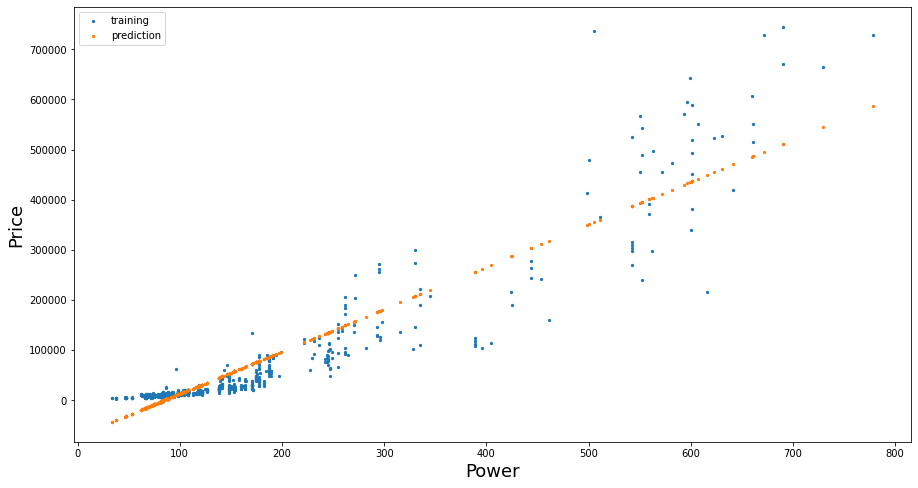

In [36]:
x = df.power
y = df.price

x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
pred = model.predict(x)
print("Model Coefficient: " + str(model.coef_))
print("Model Intercept: " + str(model.intercept_))

plt.figure(figsize=(15,8))
plt.scatter(x,y,s=5, label='training')
plt.scatter(x,pred,s=5, label='prediction')
plt.xlabel('Power',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend()
plt.show()

The model created is not a good fit to the training dataset and hence yield low accuracy scores. Hence, a better way to counter this problem and understand the trend is to use Polynomial Regression which is a better fit for the problem.

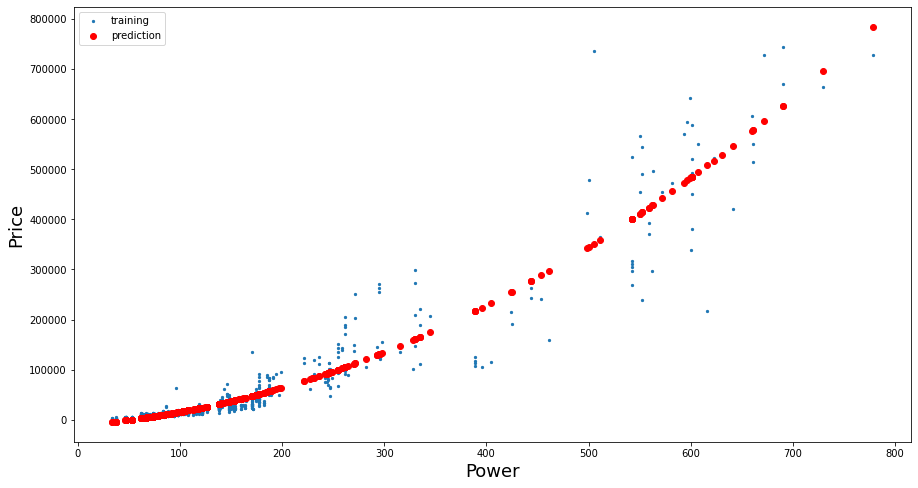

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)
model.fit(poly_features,y)
new_pred = model.predict(poly_features)

plt.figure(figsize=(15,8))
plt.scatter(x,y,s=5, label='training')
plt.scatter(x,new_pred,c='red', label='prediction')
plt.xlabel('Power',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend()
plt.show()

# Relationship between Mileage and Price

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

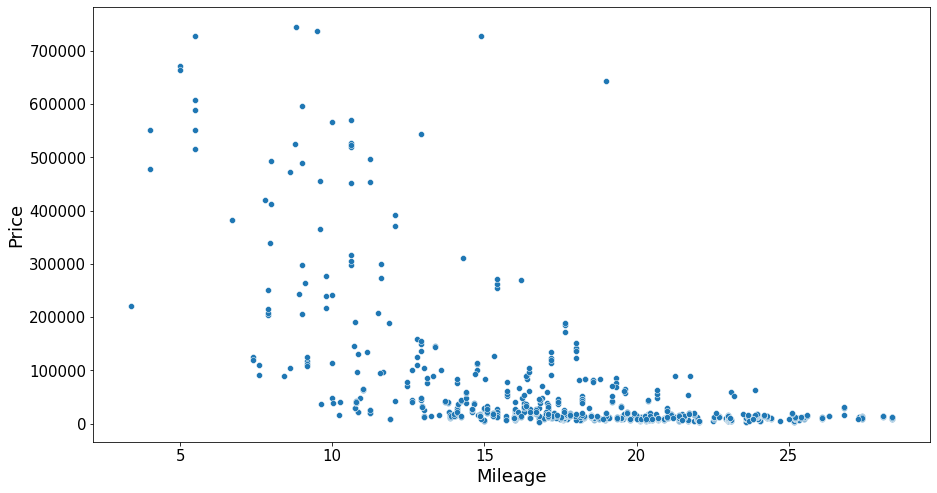

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='mileage', y='price')
plt.xlabel('Mileage',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Conclusion

From the above graph, we conclude that as price increases mileage decreases.

# 3D graph of Displacement, Price, and Fuel Tank

In [39]:
fig = px.scatter_3d(df, x='displacement', z='price', y='fuel_type', color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();